In [ ]:
!pip install yfinance
!pip install pandas-datareader
!pip install pandas==1.3

In [26]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 
import pandas as pd

#### Stocks Chosen
We have chosen the following stocks for seasonality analysis and prediction.
- Equinor (EQNR) Currency: USD
- Marriot Hotel (MAR) Currency: USD
- Microsoft (MSFT) Currency: USD
- Nestle (NESN) Currency: CHF
- Turkish Airlines - Türk Hava Yolları A.O. (THYAO) Currency: TRY

First of all we will get historical data for the stocks and save them in csv files so as to avoid calling Yahoo API over and over again, since Yahoo has introduced a number of measures to stop scrappers and reduce usage of the API.

In [8]:
def get_stock_data(tickers, start_date, end_date):
    for ticker in tickers:
        print('Getting ' + ticker + ' stock data. Period: ' + start_date + ' - ' + end_date + ' Interval: Daily')
        data = pdr.get_data_yahoo(ticker, interval='1d', start=start_date, end=end_date)
        filename = './data/' + ticker + '_' + start_date + '-' + end_date + '.csv'
        print('Saving Data. Path: ' + filename)
        # Reindex using date as index
        print(data.head())
        data.to_csv(filename)

In [23]:
ticker_list=['EQNR', 'MAR', 'MSFT', 'NESN.SW', 'THYAO.IS']

In [9]:
# We can get data by our choice by giving days bracket
start_date = '2013-01-01'
end_date = '2022-12-31'
get_stock_data(ticker_list, start_date, end_date)

Getting EQNR stock data. Period: 2013-01-01 - 2022-12-31 Interval: Daily
[*********************100%***********************]  1 of 1 completed
Saving Data. Path: ./data/EQNR_2013-01-01-2022-12-31.csv
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  25.520000  25.680000  25.400000  25.600000  16.050177  1369500
2013-01-03  25.410000  25.610001  25.309999  25.360001  15.899709  1183800
2013-01-04  25.219999  25.490000  25.190001  25.459999  15.962400   605000
2013-01-07  25.100000  25.240000  25.010000  25.150000  15.768044   787400
2013-01-08  25.150000  25.180000  25.040001  25.150000  15.768044   901800
Getting MAR stock data. Period: 2013-01-01 - 2022-12-31 Interval: Daily
[*********************100%***********************]  1 of 1 completed
Saving Data. Path: ./data/MAR_2013-01-01-2022-12-31.csv
                 Open       High        Low      Close  Adj Close   Volume
Date

In [26]:
eqnr = pd.read_csv('./data/EQNR_2013-01-01-2022-12-31.csv', index_col = 0)
mar = pd.read_csv('./data/MAR_2013-01-01-2022-12-31.csv', index_col = 0)
msft = pd.read_csv('./data/MSFT_2013-01-01-2022-12-31.csv', index_col = 0)
nesn = pd.read_csv('./data/NESN.SW_2013-01-01-2022-12-31.csv', index_col = 0)
thyao = pd.read_csv('./data/THYAO.IS_2013-01-01-2022-12-31.csv', index_col = 0)

In [27]:
eqnr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,25.520000,25.680000,25.400000,25.600000,16.050177,1369500
2013-01-03,25.410000,25.610001,25.309999,25.360001,15.899709,1183800
2013-01-04,25.219999,25.490000,25.190001,25.459999,15.962400,605000
2013-01-07,25.100000,25.240000,25.010000,25.150000,15.768044,787400
2013-01-08,25.150000,25.180000,25.040001,25.150000,15.768044,901800


In [6]:
import matplotlib.pyplot as plt

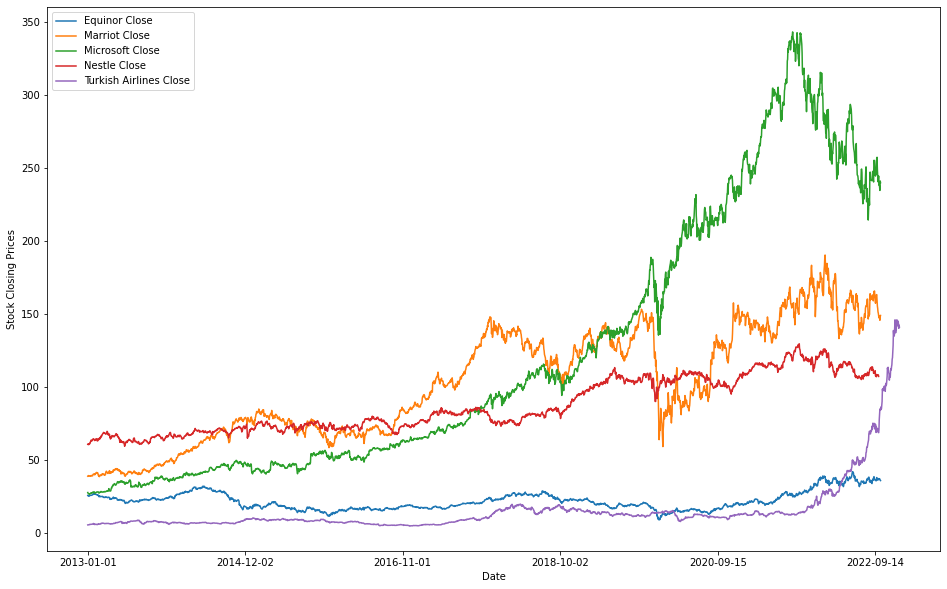

In [7]:
# Plotting closing values of stocks
eqnr['Close'].plot(label = 'Equinor Close', figsize = (16, 10))
mar['Close'].plot(label = 'Marriot Close')
msft['Close'].plot(label = 'Microsoft Close')
nesn['Close'].plot(label = 'Nestle Close')
thyao['Close'].plot(label = 'Turkish Airlines Close')
plt.legend()
plt.ylabel('Stock Closing Prices')
plt.show()

We see that Roughly all the stocks have roughly the same trend. From 2013 uptill 2018 the stock values follow a flat trend but after 2018 all the stocks tend to increase in value. Let's plot the volume of the stocks and see if that could have had an impact on the values increasing.

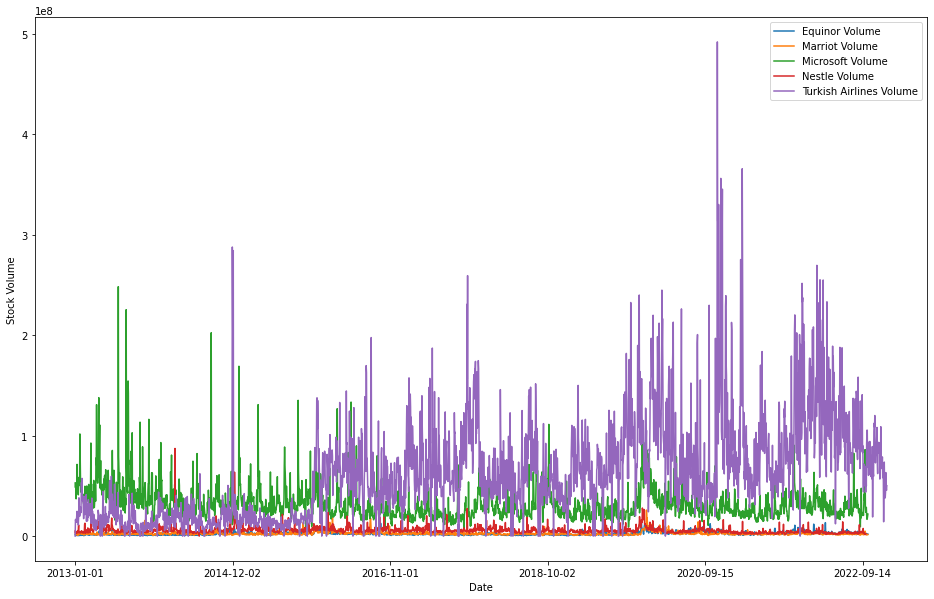

In [8]:
# Plotting volume of stocks
eqnr['Volume'].plot(label = 'Equinor Volume', figsize = (16, 10))
mar['Volume'].plot(label = 'Marriot Volume')
msft['Volume'].plot(label = 'Microsoft Volume')
nesn['Volume'].plot(label = 'Nestle Volume')
thyao['Volume'].plot(label = 'Turkish Airlines Volume')
plt.legend()
plt.ylabel('Stock Volume')
plt.show()

This graph does not help alot to visualize how valuable a stock is so we will add a Traded Volume column to the dataframe to help us visualize the value of a stock.

In [14]:
eqnr['Traded'] = eqnr['Close'] * eqnr['Volume']
mar['Traded'] = mar['Close'] * mar['Volume']
msft['Traded'] = msft['Close'] * msft['Volume']
nesn['Traded'] = nesn['Close'] * nesn['Volume']
thyao['Traded'] = thyao['Close'] * thyao['Volume']

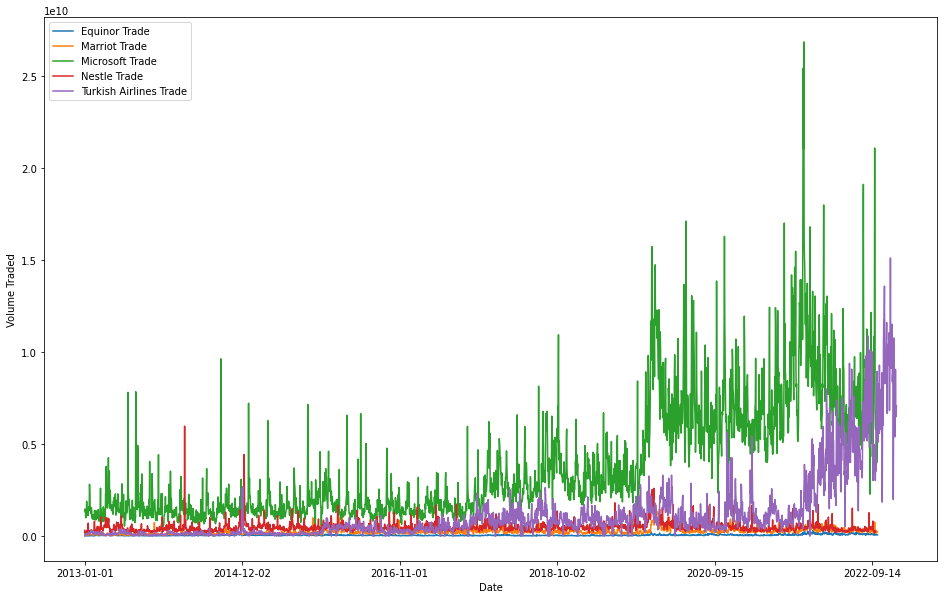

In [15]:
# Plotting Traded Volume
eqnr['Traded'].plot(label = 'Equinor Trade', figsize = (16, 10))
mar['Traded'].plot(label = 'Marriot Trade')
msft['Traded'].plot(label = 'Microsoft Trade')
nesn['Traded'].plot(label = 'Nestle Trade')
thyao['Traded'].plot(label = 'Turkish Airlines Trade')
plt.legend()
plt.ylabel('Volume Traded')
plt.show()

#### Pre-Processing
1. First of all we resample values to fill in any missing day values. We use linear interpolation to fill in the data after resampling
2. We will only be working with closing prices of the stocks so creating a dataframe with closing prices of the 5 stocks we have chosen

We need to some model specific pre processing which we will do in the section for each model

In [28]:
def resample_daily(df):
    # Index using datetime to be able to plot seasonality and trend
    df.index = pd.to_datetime(df.index)
    # Resample to fill in missing days in the timeseries
    # Using linear interpolation to fill in the missing values
    return df.resample('1D').asfreq().interpolate(method = 'linear')

In [29]:
# Seasonal_decompose method can't accept gaps in the dataset. So we will fill the missing days with linear interpolation
eqnr = resample_daily(eqnr)
mar = resample_daily(mar)
msft = resample_daily(msft)
nesn = resample_daily(nesn)
thyao = resample_daily(thyao)

In [46]:
closing_price = pd.DataFrame()
closing_price['EQNR'] = eqnr['Close']
closing_price['MAR'] = mar['Close']
closing_price['MSFT'] = msft['Close']
closing_price['NESN.SW'] = nesn['Close']
closing_price['THYAO.IS'] = thyao['Close']
closing_price = closing_price.fillna(0)
closing_price.head()

,EQNR,MAR,MSFT,NESN.SW,THYAO.IS
Date,,,,,
2013-01-02,25.600000,38.790001,27.620001,0.000000,5.530434
2013-01-03,25.360001,39.099998,27.250000,60.650002,5.460869
2013-01-04,25.459999,39.230000,26.740000,61.000000,5.495652
2013-01-05,25.356666,39.156666,26.723333,60.916667,5.530435
2013-01-06,25.253333,39.083332,26.706667,60.833333,5.565217


### Time Series Components

First of all we will analyze time series's componenets. Most time series data can be broken down into 2 kinds of components.
- Systematic components are components that can be modelled. Systematic components of the Stock data are Trend and Seasonality.
- Non-Systematic components that cannot be modeled like noise. Stock data contains a lot of noise which can be variation to the stock prices from external factors like global phenomena not accounted for in the model.

There are 2 kinds of models to break a time series into components.
- Additive Model: This is the model where any point in the time series the value can be represented by a sum of components.
- Multiplicative Model: This is the model where any point in the series is represented by a product of the components.

We tried both models for decomposition of stock data and both presented similar results.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_into_seasonality_and_trend(series, model = 'additive', period = 90):
    series_components = seasonal_decompose(series, model = model, period = period)
    return [series_components.trend, series_components.seasonal]

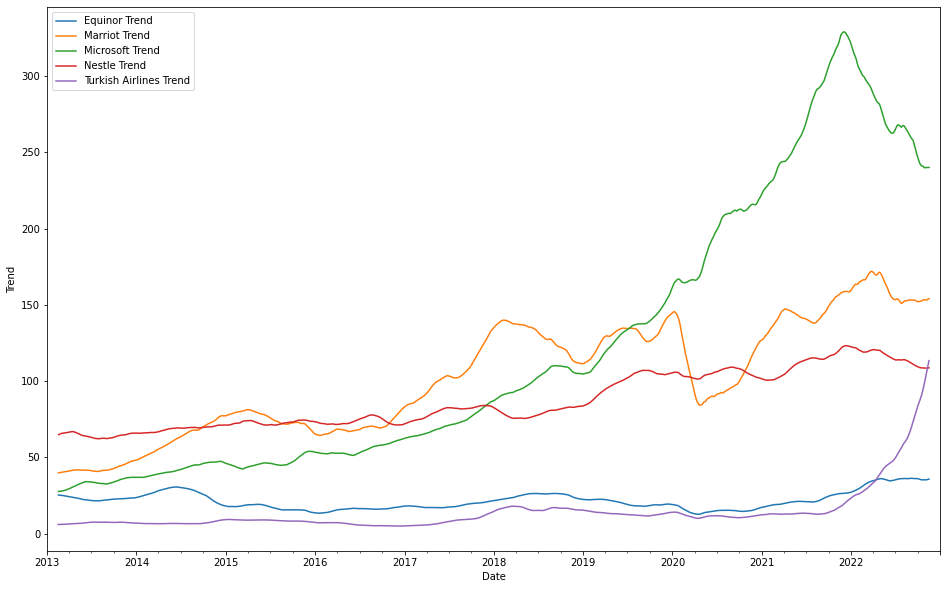

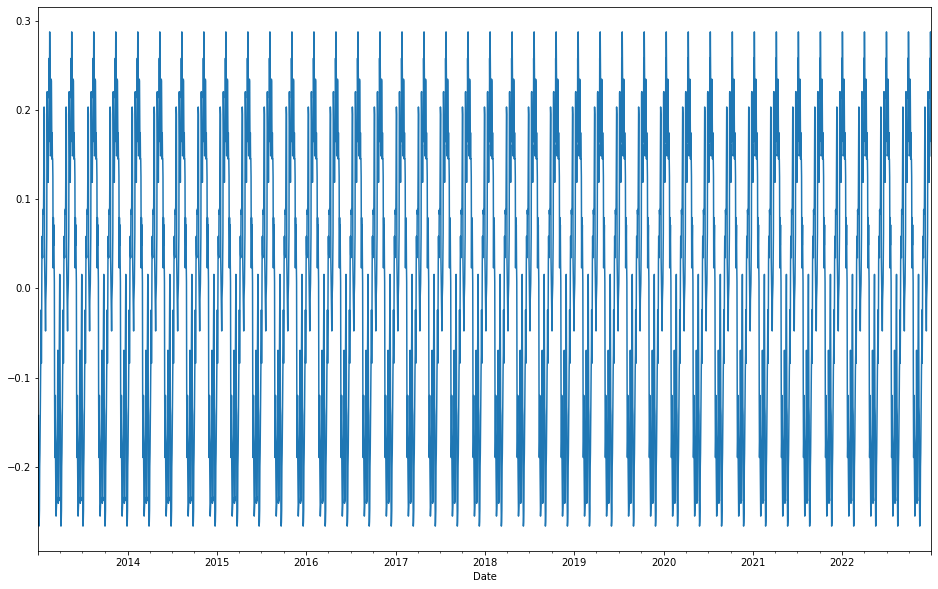

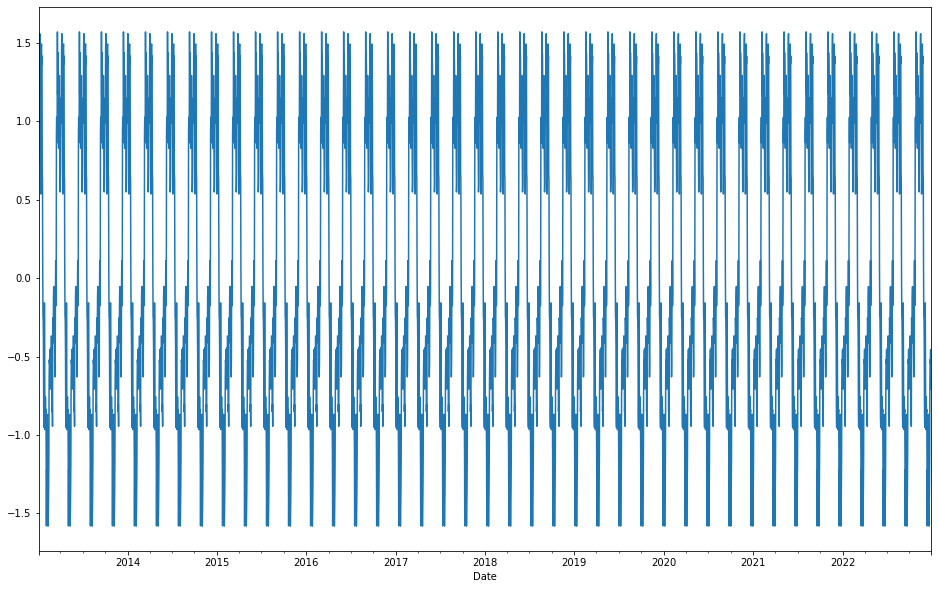

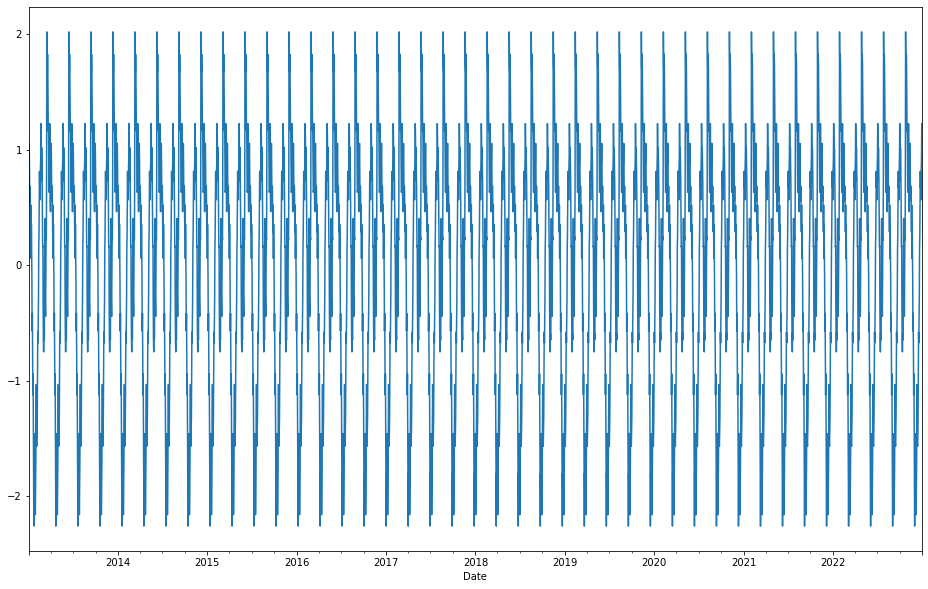

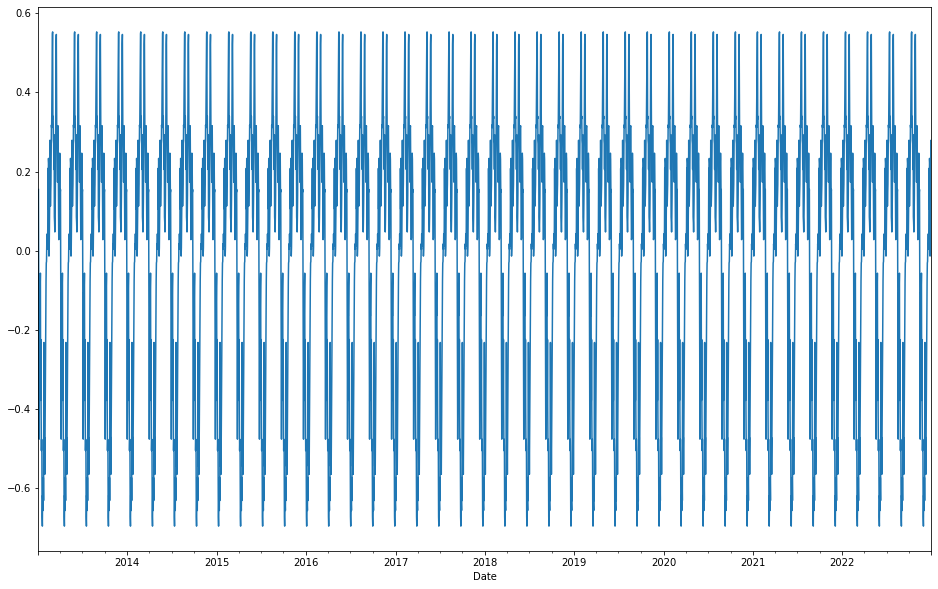

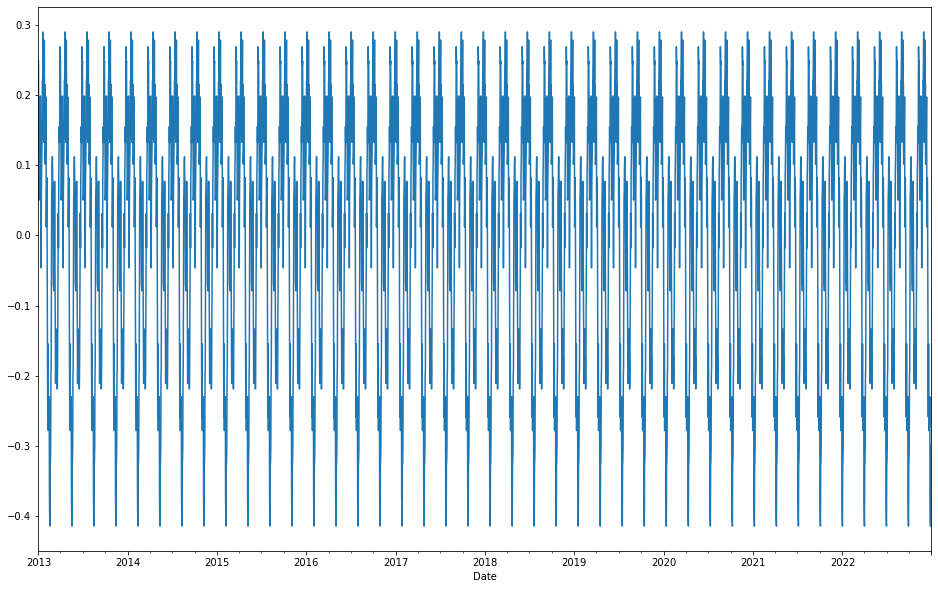

In [32]:
[eqnr_trend, eqnr_seasonality] = decompose_into_seasonality_and_trend(eqnr['Close'])
[mar_trend, mar_seasonality] = decompose_into_seasonality_and_trend(mar['Close'])
[msft_trend, msft_seasonality] = decompose_into_seasonality_and_trend(msft['Close'])
[nesn_trend, nesn_seasonality] = decompose_into_seasonality_and_trend(nesn['Close'])
[thyao_trend, thyao_seasonality] = decompose_into_seasonality_and_trend(thyao['Close'])

eqnr_trend.plot(label = 'Equinor Trend', figsize = (16, 10))
mar_trend.plot(label = 'Marriot Trend')
msft_trend.plot(label = 'Microsoft Trend')
nesn_trend.plot(label = 'Nestle Trend')
thyao_trend.plot(label = 'Turkish Airlines Trend')
plt.legend()
plt.ylabel('Trend')
plt.show()


eqnr_seasonality.plot(label = 'Equinor Seasonality', figsize = (16, 10))
plt.show()
mar_seasonality.plot(label = 'Marriot Seasonality', figsize = (16, 10))
plt.show()
msft_seasonality.plot(label = 'Microsoft Seasonality', figsize = (16, 10))
plt.show()
nesn_seasonality.plot(label = 'Nestle Seasonality', figsize = (16, 10))
plt.show()
thyao_seasonality.plot(label = 'Turkish Airlines Seasonality', figsize = (16, 10))
plt.show()

From the above graphs we can not read much information from the seasonality decomposition because of a high level of noise in the data so we will break it down and compute seasonality for one year at a time and plot them

In [39]:
def plot_yearly_seasonality(series, start = 2013, end = 2018):
    from_index = 0
    to_index = 365
    for i in range(start, end):
        [_, seasonality] = decompose_into_seasonality_and_trend(series[from_index:to_index])
        from_index = to_index
        to_index = to_index + 365
        seasonality.plot(label = str(i), figsize = (16, 10))

    plt.legend()
    plt.show()

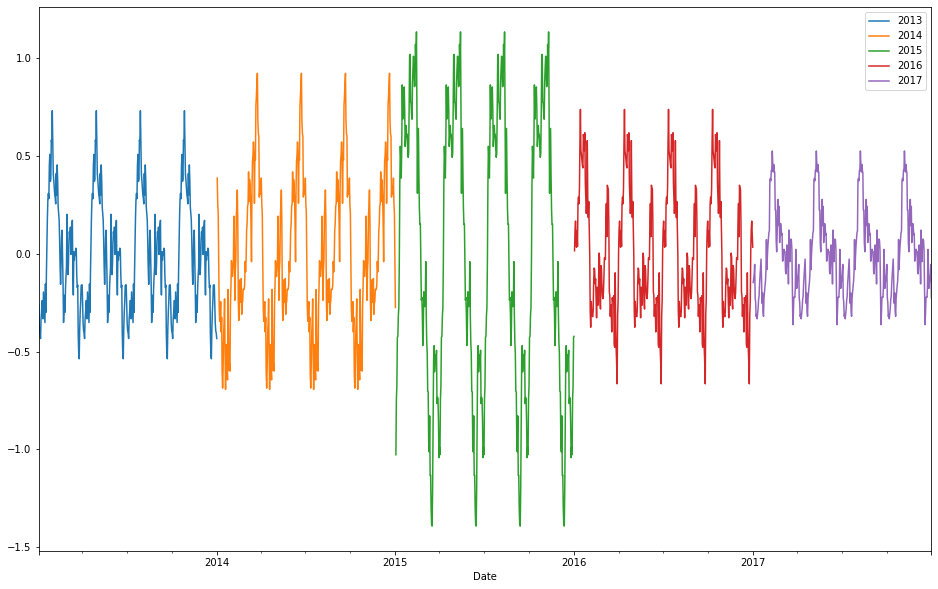

In [40]:
plot_yearly_seasonality(eqnr['Close'])

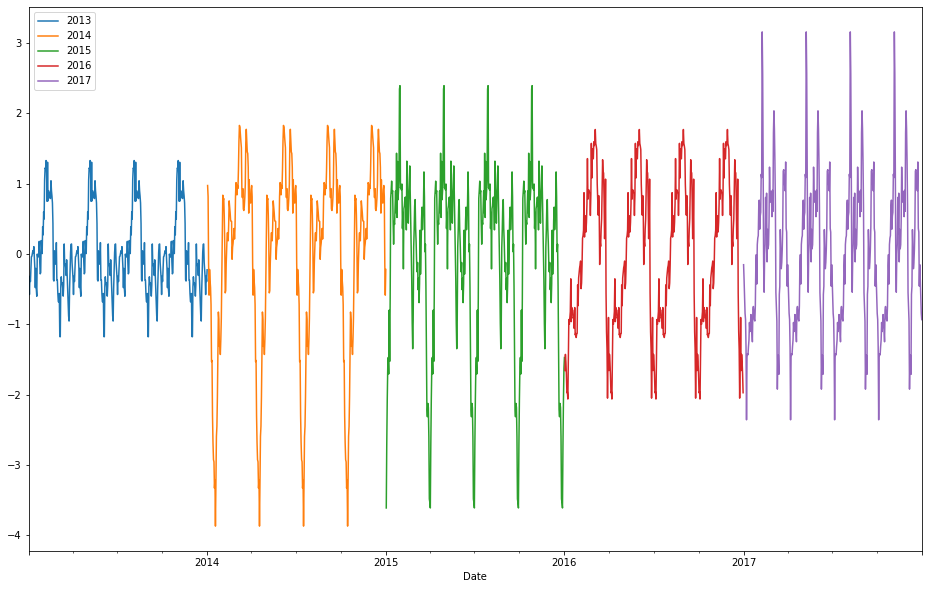

In [41]:
plot_yearly_seasonality(mar['Close'])

# ARIMA

For ARIMA, time series has to be made stationary for further analysis. What is stationarity and why is it important in the analysis of time series data? In simple words stationarity mean that the statistical properties of the process that outputs the time series data does not change as we progress further in the time series. Or that as the time series changes the way it changes stays consistent. Noise presents a problem in the stationarity of the time series normally. 

So following the above hypothesis we want the properties like mean and variance to stay consistent throughout the series. A stationary time series will have no long-term predictable patterns such as trends or seasonality. Time plots will show the series to roughly have a horizontal trend with the constant variance.

ARIMA model requires the time series data to be stationary. So we normalize the dataset so that the stock data becomes stationary. To test for stationarity we use Augmented Dicky-Fuller (ADF) which states that if the p-value is < 0.05 then the data is stationary otherwise the data is non stationary.

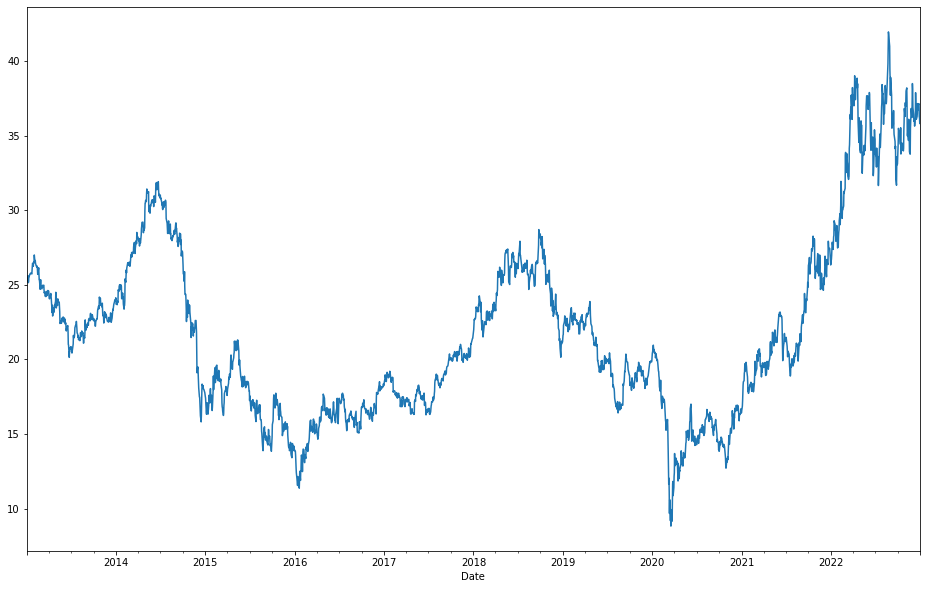

EQNR ADF: 
ADF Test:
p-value: 0.651642


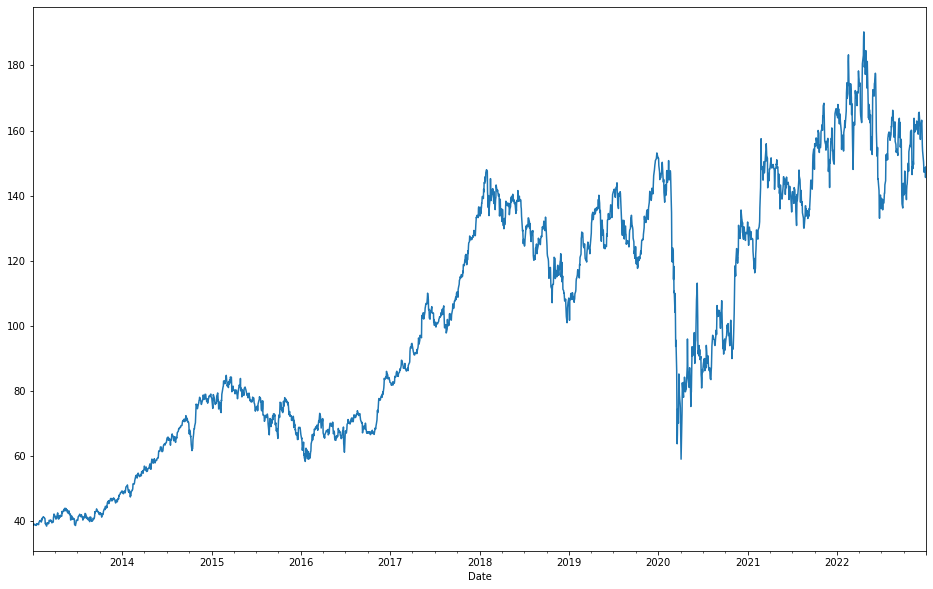

MAR ADF: 
ADF Test:
p-value: 0.492338


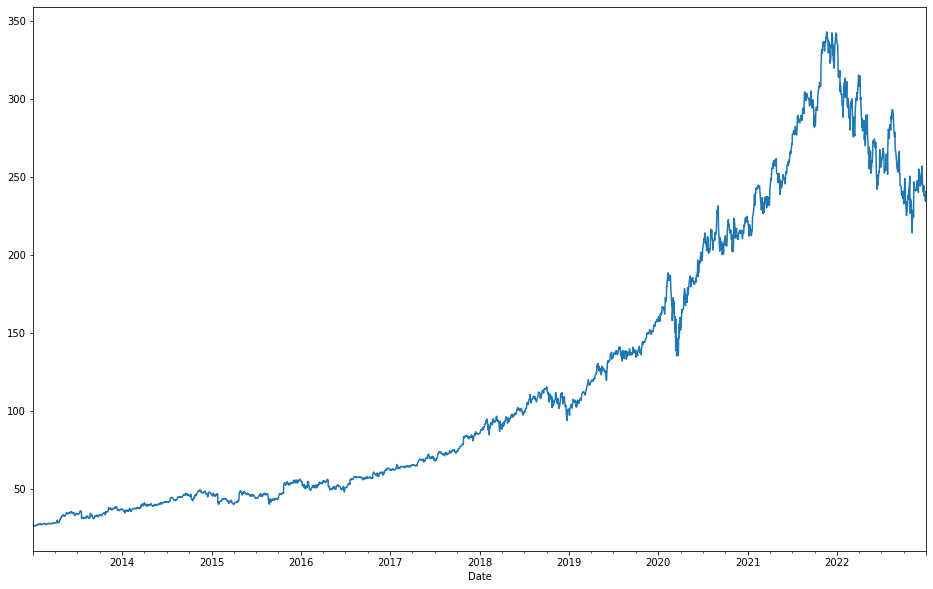

MSFT ADF: 
ADF Test:
p-value: 0.920354


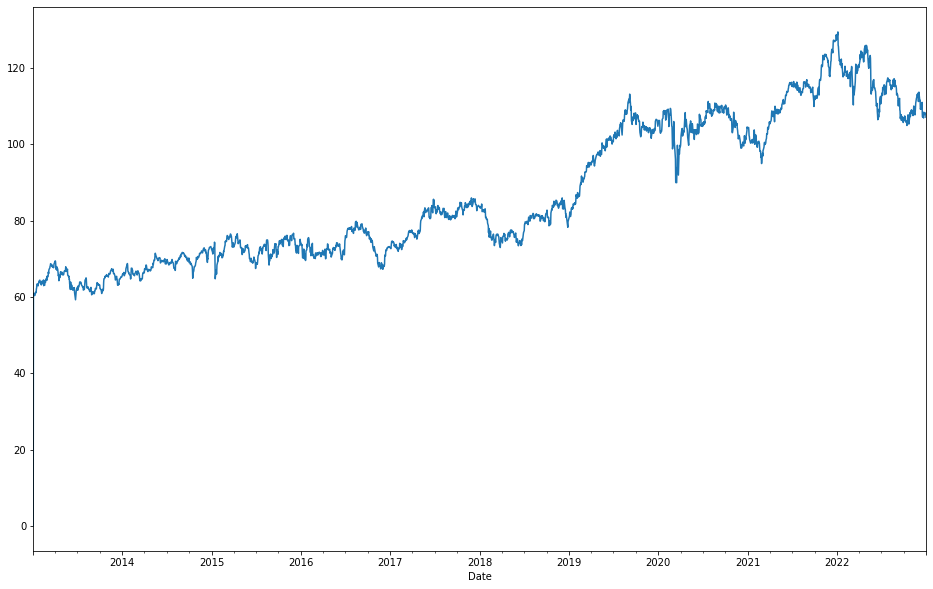

NESN.SW ADF: 
ADF Test:
p-value: 0.633200


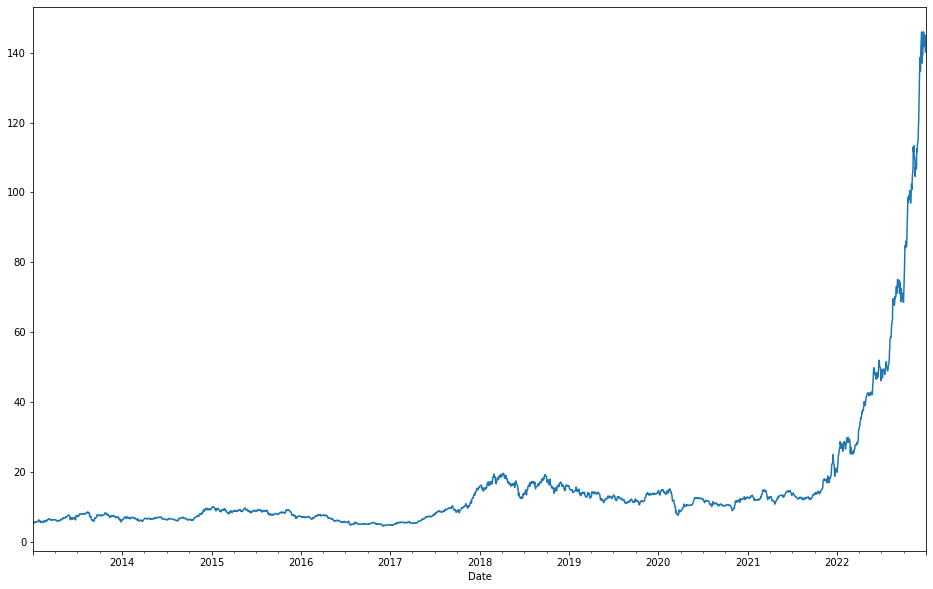

THYAO.IS ADF: 
ADF Test:
p-value: 1.000000


In [57]:
from statsmodels.tsa.stattools import adfuller

def is_series_stationary(stock_close_price):
    print("ADF Test:")
    adf_test = adfuller(stock_close_price, autolag = 'AIC')
    print('p-value: %f' % adf_test[1])

for i in ticker_list:
    closing_price[i].plot(figsize = (16, 10))
    plt.show()
    print(i + ' ADF: ')
    is_series_stationary(closing_price[i])

As we can see that all the time series have p > 0.05 meaning that all the time series are not-stationary. We can make our time series stationary by using a method called differencing. In differencing a new series is calculated by calculating the value at the current time by differencing the value of actual observation of current time and its previous time (n).

```y(t) = y(t) - y(t - n)```

##### Model Building
ARIMA model needs 3 parameters
1. p which is the order of the auto-regressive model.
2. d which is the difference order.
3. q which is the order of the moving average model.

To find out the optimal values for our ARIMA model we will look at the Autocorrelation plots and the Partial Autocorrelation plots to find out the values for p, d and q.

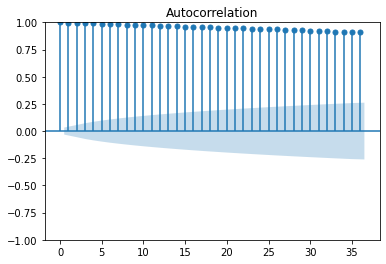

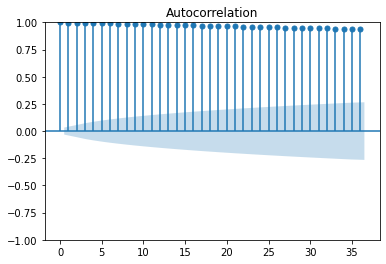

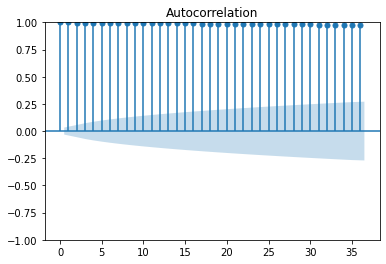

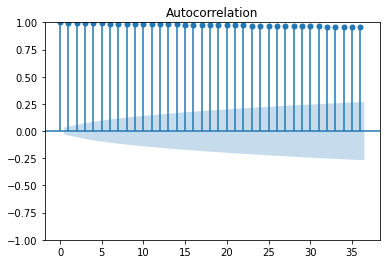

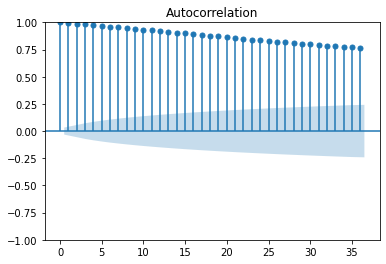

In [81]:
for i in ticker_list:
    plot_acf(closing_price[i].values)

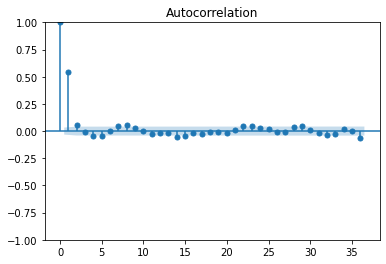

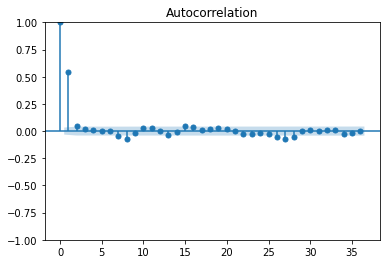

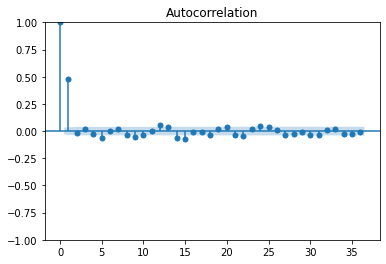

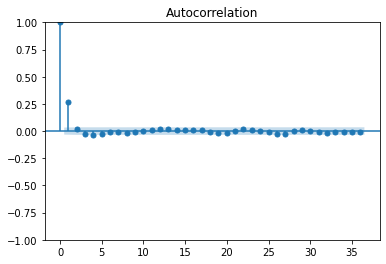

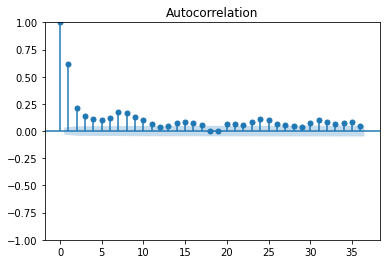

In [82]:
from statsmodels.graphics.tsaplots import plot_acf

# Order 1 differencing
closing_price_1n = closing_price.diff(periods = 1).dropna()

for i in ticker_list:
    plot_acf(closing_price_1n[i].values)

c:\users\rehman\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
c:\users\rehman\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
c:\users\rehman\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by s

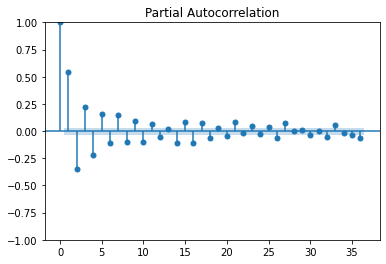

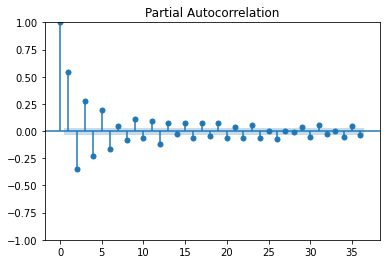

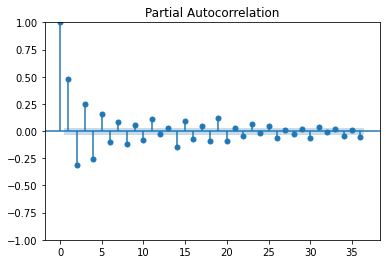

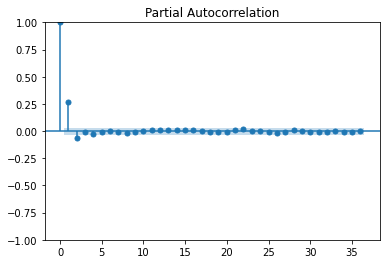

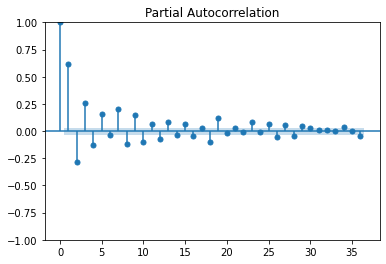

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf

for i in ticker_list:
    plot_pacf(closing_price_1n[i].values)

In [85]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
model = ARIMA(closing_price_1n['EQNR'], order = (1, 1, 2))
model_results = model.fit()

In [97]:
ARIMA_diff_pred = pd.Series(model_results.fittedvalues, copy=True) # converting the fitted values of the results into series
ARIMA_pred_cumsum = ARIMA_diff_pred.cumsum() # calculating the cumulative sum
ARIMA_pred = pd.Series(closing_price['EQNR'].iloc[0], index = closing_price['EQNR'].index)
ARIMA_pred = ARIMA_pred.add(ARIMA_pred_cumsum, fill_value = 0) # adding the cumulative sum to the differenced data to cancel out the differencing effect

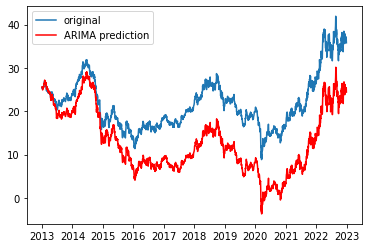

In [98]:
plt.plot(closing_price['EQNR'],label='original')
plt.plot(ARIMA_pred,color='red',label='ARIMA prediction')
plt.legend(labels=['original','ARIMA prediction'])
plt.show()

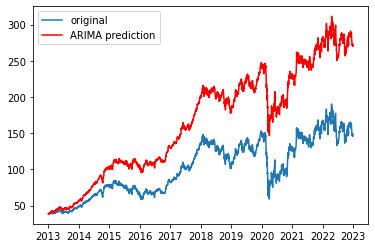

In [107]:
model = ARIMA(closing_price_1n['MAR'], order = (1, 1, 2))
model_results = model.fit()

ARIMA_diff_pred = pd.Series(model_results.fittedvalues, copy=True) # converting the fitted values of the results into series
ARIMA_pred_cumsum = ARIMA_diff_pred.cumsum() # calculating the cumulative sum
ARIMA_pred = pd.Series(closing_price['MAR'].iloc[0], index = closing_price['MAR'].index)
ARIMA_pred = ARIMA_pred.add(ARIMA_pred_cumsum, fill_value = 0) # adding the cumulative sum to the differenced data to cancel out the differencing effect

plt.plot(closing_price['MAR'],label='original')
plt.plot(ARIMA_pred,color='red',label='ARIMA prediction')
plt.legend(labels=['original','ARIMA prediction'])
plt.show()

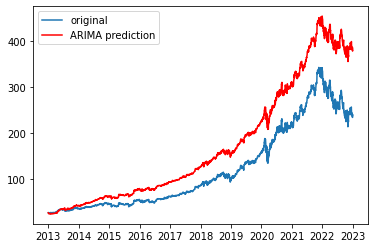

In [108]:
model = ARIMA(closing_price_1n['MSFT'], order = (1, 1, 2))
model_results = model.fit()

ARIMA_diff_pred = pd.Series(model_results.fittedvalues, copy=True) # converting the fitted values of the results into series
ARIMA_pred_cumsum = ARIMA_diff_pred.cumsum() # calculating the cumulative sum
ARIMA_pred = pd.Series(closing_price['MSFT'].iloc[0], index = closing_price['MSFT'].index)
ARIMA_pred = ARIMA_pred.add(ARIMA_pred_cumsum, fill_value = 0) # adding the cumulative sum to the differenced data to cancel out the differencing effect

plt.plot(closing_price['MSFT'],label='original')
plt.plot(ARIMA_pred,color='red',label='ARIMA prediction')
plt.legend(labels=['original','ARIMA prediction'])
plt.show()

# LSTM

In [11]:
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np

train_set_size = math.ceil(closing_price.shape[0] * 0.8)
ticker_list=['EQNR', 'MAR', 'MSFT', 'NESN.SW', 'THYAO.IS']
# ticker_list=['EQNR']
x_train_data = []
y_train_data = []

x_test_data = []
y_test_data = []

for i in ticker_list:
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(closing_price[i].values.reshape(-1, 1))
    train_data = scaled_data[0: train_set_size, :]

    x_train = []
    y_train = []

    # Create a 60-days window of historical prices (i-60) as our feature data (x_train) and the following 60-days window as label data (y_train).
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_train_data.append(x_train)
    y_train_data.append(y_train)
    
    # Test data
    
    test_data = scaled_data[train_set_size - 60: , : ]
    x_test = []
    y_test = closing_price[i].values[train_set_size:]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    x_test_data.append(x_test)
    y_test_data.append(y_test)
    
print(x[0].shape)

NameError: name 'closing_price' is not defined

In [124]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 896.6/896.6 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 781.3/

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train_data[0].shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

NameError: name 'x_train_data' is not defined